In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import missingno as msno
import pdb
from scipy import stats
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,1800,7503


In [145]:
cleaned_KC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21347
Data columns (total 17 columns):
id               21301 non-null int64
date             21301 non-null object
price            21301 non-null float64
bedrooms         21301 non-null int64
bathrooms        21301 non-null float64
sqft_living      21301 non-null int64
sqft_lot         21301 non-null int64
floors           21301 non-null float64
view             21301 non-null float64
condition        21301 non-null int64
grade            21301 non-null int64
yr_built         21301 non-null int64
zipcode          21301 non-null int64
lat              21301 non-null float64
long             21301 non-null float64
sqft_living15    21301 non-null int64
sqft_lot15       21301 non-null int64
dtypes: float64(6), int64(10), object(1)
memory usage: 2.9+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c9a8592e8>,
      dtype=object)

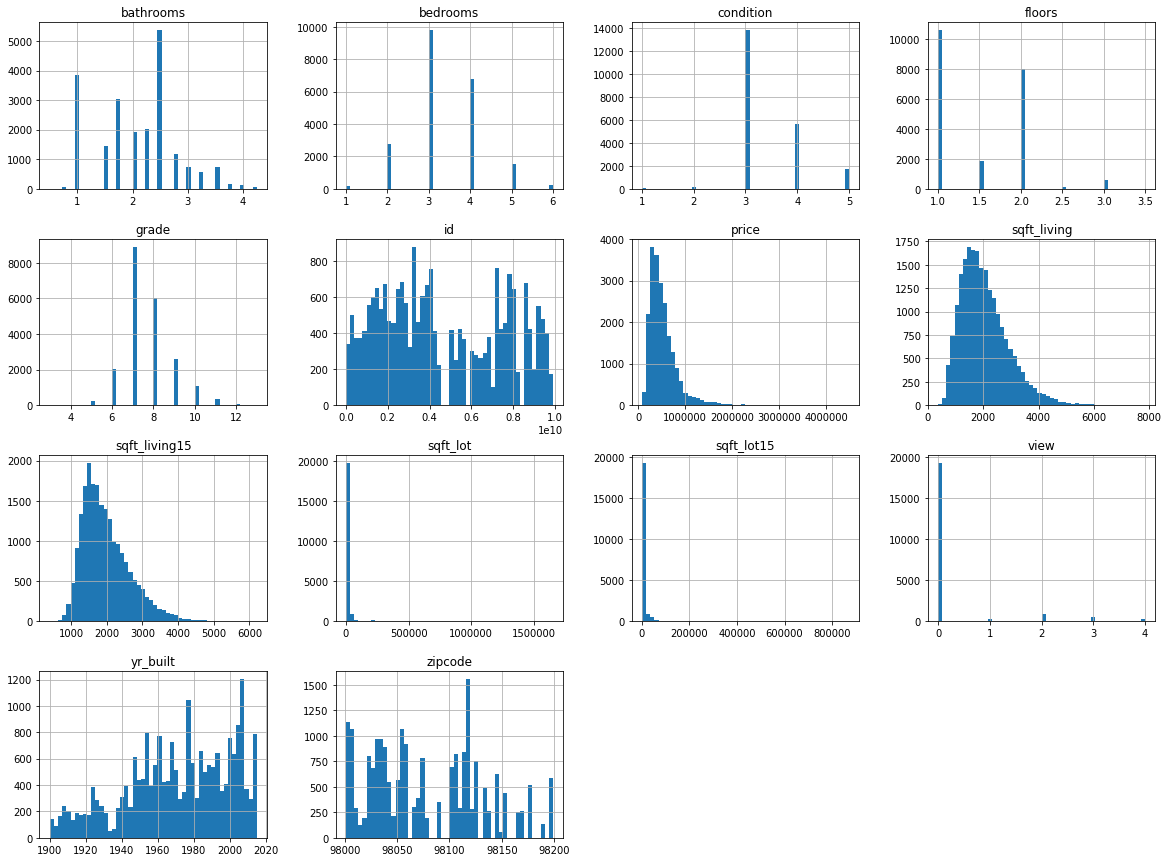

In [142]:
cleaned_KC.hist(bins=50, figsize=(20,15))

Could potentially underlay a map of King's County in the plot below.

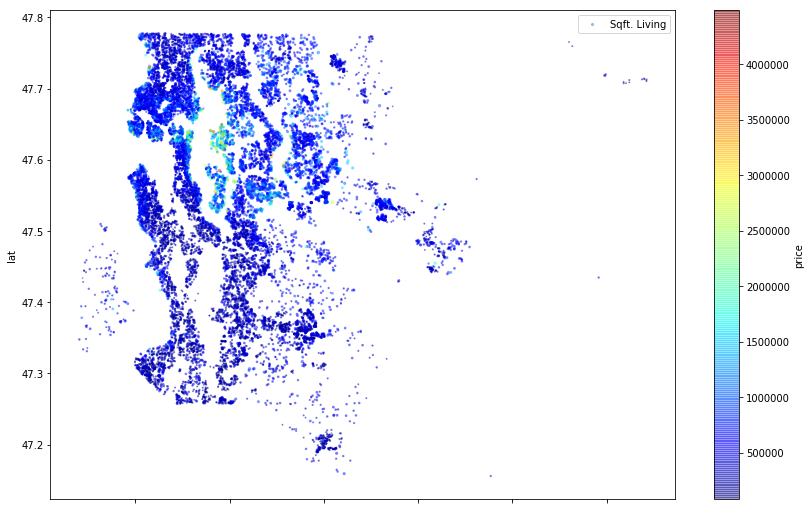

In [160]:
cleaned_KC.plot(kind='scatter', x='long', y='lat', alpha=0.4 ,s=cleaned_KC['sqft_living']/1000, label='Sqft. Living', 
                figsize=(14,9), c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [102]:
# stripping all cells with leading or trailing spaces
cleaned_KC = cleaned_KC.applymap(lambda x: x.strip() if type(x) == str else x)

In [103]:
index_id_KC = cleaned_KC.set_index(['id','date'])
index_id_KC.sort_values(by='id')

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id         date                                                               
1000102    9/16/2014   280000.0         6       3.00         2400      9373   
           4/22/2015   300000.0         6       3.00         2400      9373   
1200019    5/8/2014    647500.0         4       1.75         2060     26036   
1200021    8/11/2014   400000.0         3       1.00         1460     43000   
2800031    4/1/2015    235000.0         3       1.00         1430      7599   
3600057    3/19/2015   402500.0         4       2.00         1650      3504   
3600072    3/30/2015   680000.0         4       2.75         2220      5310   
3800008    2/24/2015   178000.0         5       1.50         1990     18200   
5200087    7/9/2014    487000.0         4       2.50         2540      5001   
6200017    11/12/2014  281000.0         3       1.00         1340     21336   
7200080    11/4/2014   239000.0         4       2.00         1980     10585   
7200179    4/24/2015   175000.0         2       1.00          840     12750   
           10/16/2014  150000.0         2       1.00          840     12750   
7400062    5/21/2014   299800.0         2       1.00          790      5240   
7600057    8/5/2014    520000.0         3       2.00         1410      2700   
7600065    6/5/2014    465000.0         3       2.25         1530      1245   
7600125    12/18/2014  630000.0         5       1.00         3020      4800   
7600136    7/18/2014   411000.0         2       2.00         1130      1148   
9000025    12/3/2014   496000.0         2       1.00         1420      4635   
11200070   7/21/2014   570000.0         3       2.50         1530      3296   
11200290   6/9/2014    546000.0         3       2.50         1530      3464   
11200400   9/23/2014   617000.0         3       2.50         1910      4488   
11300120   6/30/2014   635000.0         3       2.50         3350      4007   
11500240   4/28/2015   872750.0         3       2.50         2870     13695   
11500890   3/12/2015   843000.0         3       2.50         3130      8750   
11501160   6/17/2014   837700.0         5       2.75         3010     12611   
11501310   11/21/2014  715000.0         3       3.25         3060      9055   
11501330   9/2/2014    795000.0         3       3.50         3190     10223   
11510310   9/5/2014    835000.0         4       2.75         3130     13412   
11510700   5/19/2014   755000.0         4       2.50         2660     10452   
...                         ...       ...        ...          ...       ...   
9834200925 9/10/2014   330000.0         3       2.25         1340      4080   
9834200950 6/16/2014   385000.0         4       1.75         1690      4080   
9834200975 2/10/2015   495000.0         3       3.00         1520      4080   
9834201100 12/22/2014  332500.0         4       2.00         1440      4855   
9834201145 2/22/2015   635000.0         4       2.50         2880      3091   
9834201205 3/4/2015    385000.0         1       1.00          620      5100   
9834201215 10/9/2014   276000.0         2       1.00          870      2676   
9834201366 12/16/2014  429900.0         3       2.00         1490      1286   
9834201367 1/26/2015   429000.0         3       2.00         1490      1126   
9834201370 4/17/2015   430100.0         3       2.25         1400      1078   
9834201375 2/6/2015    425000.0         3       2.25         1420      1230   
9834201470 12/18/2014  303000.0         2       1.50         1000      1075   
9835800320 8/28/2014   300000.0         4       1.75         2080      8750   
9835800750 12/3/2014   247000.0         3       2.25         1640      7630   
9835800840 2/4/2015    215000.0         4       2.00         1470      7000   
9835801000 6/25/2014   245700.0         3       2.25         1640      8400   
9839300125 1/7/2015    575000.0         4       2.00         1810      4400   
9839300285 4/12/2015   720000.0         3       2.50         2100      2200 

In [104]:
mean_of_price = cleaned_KC['price'].mean()
mean_of_price

529090.4964555654

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c8fe87630>,
      dtype=object)

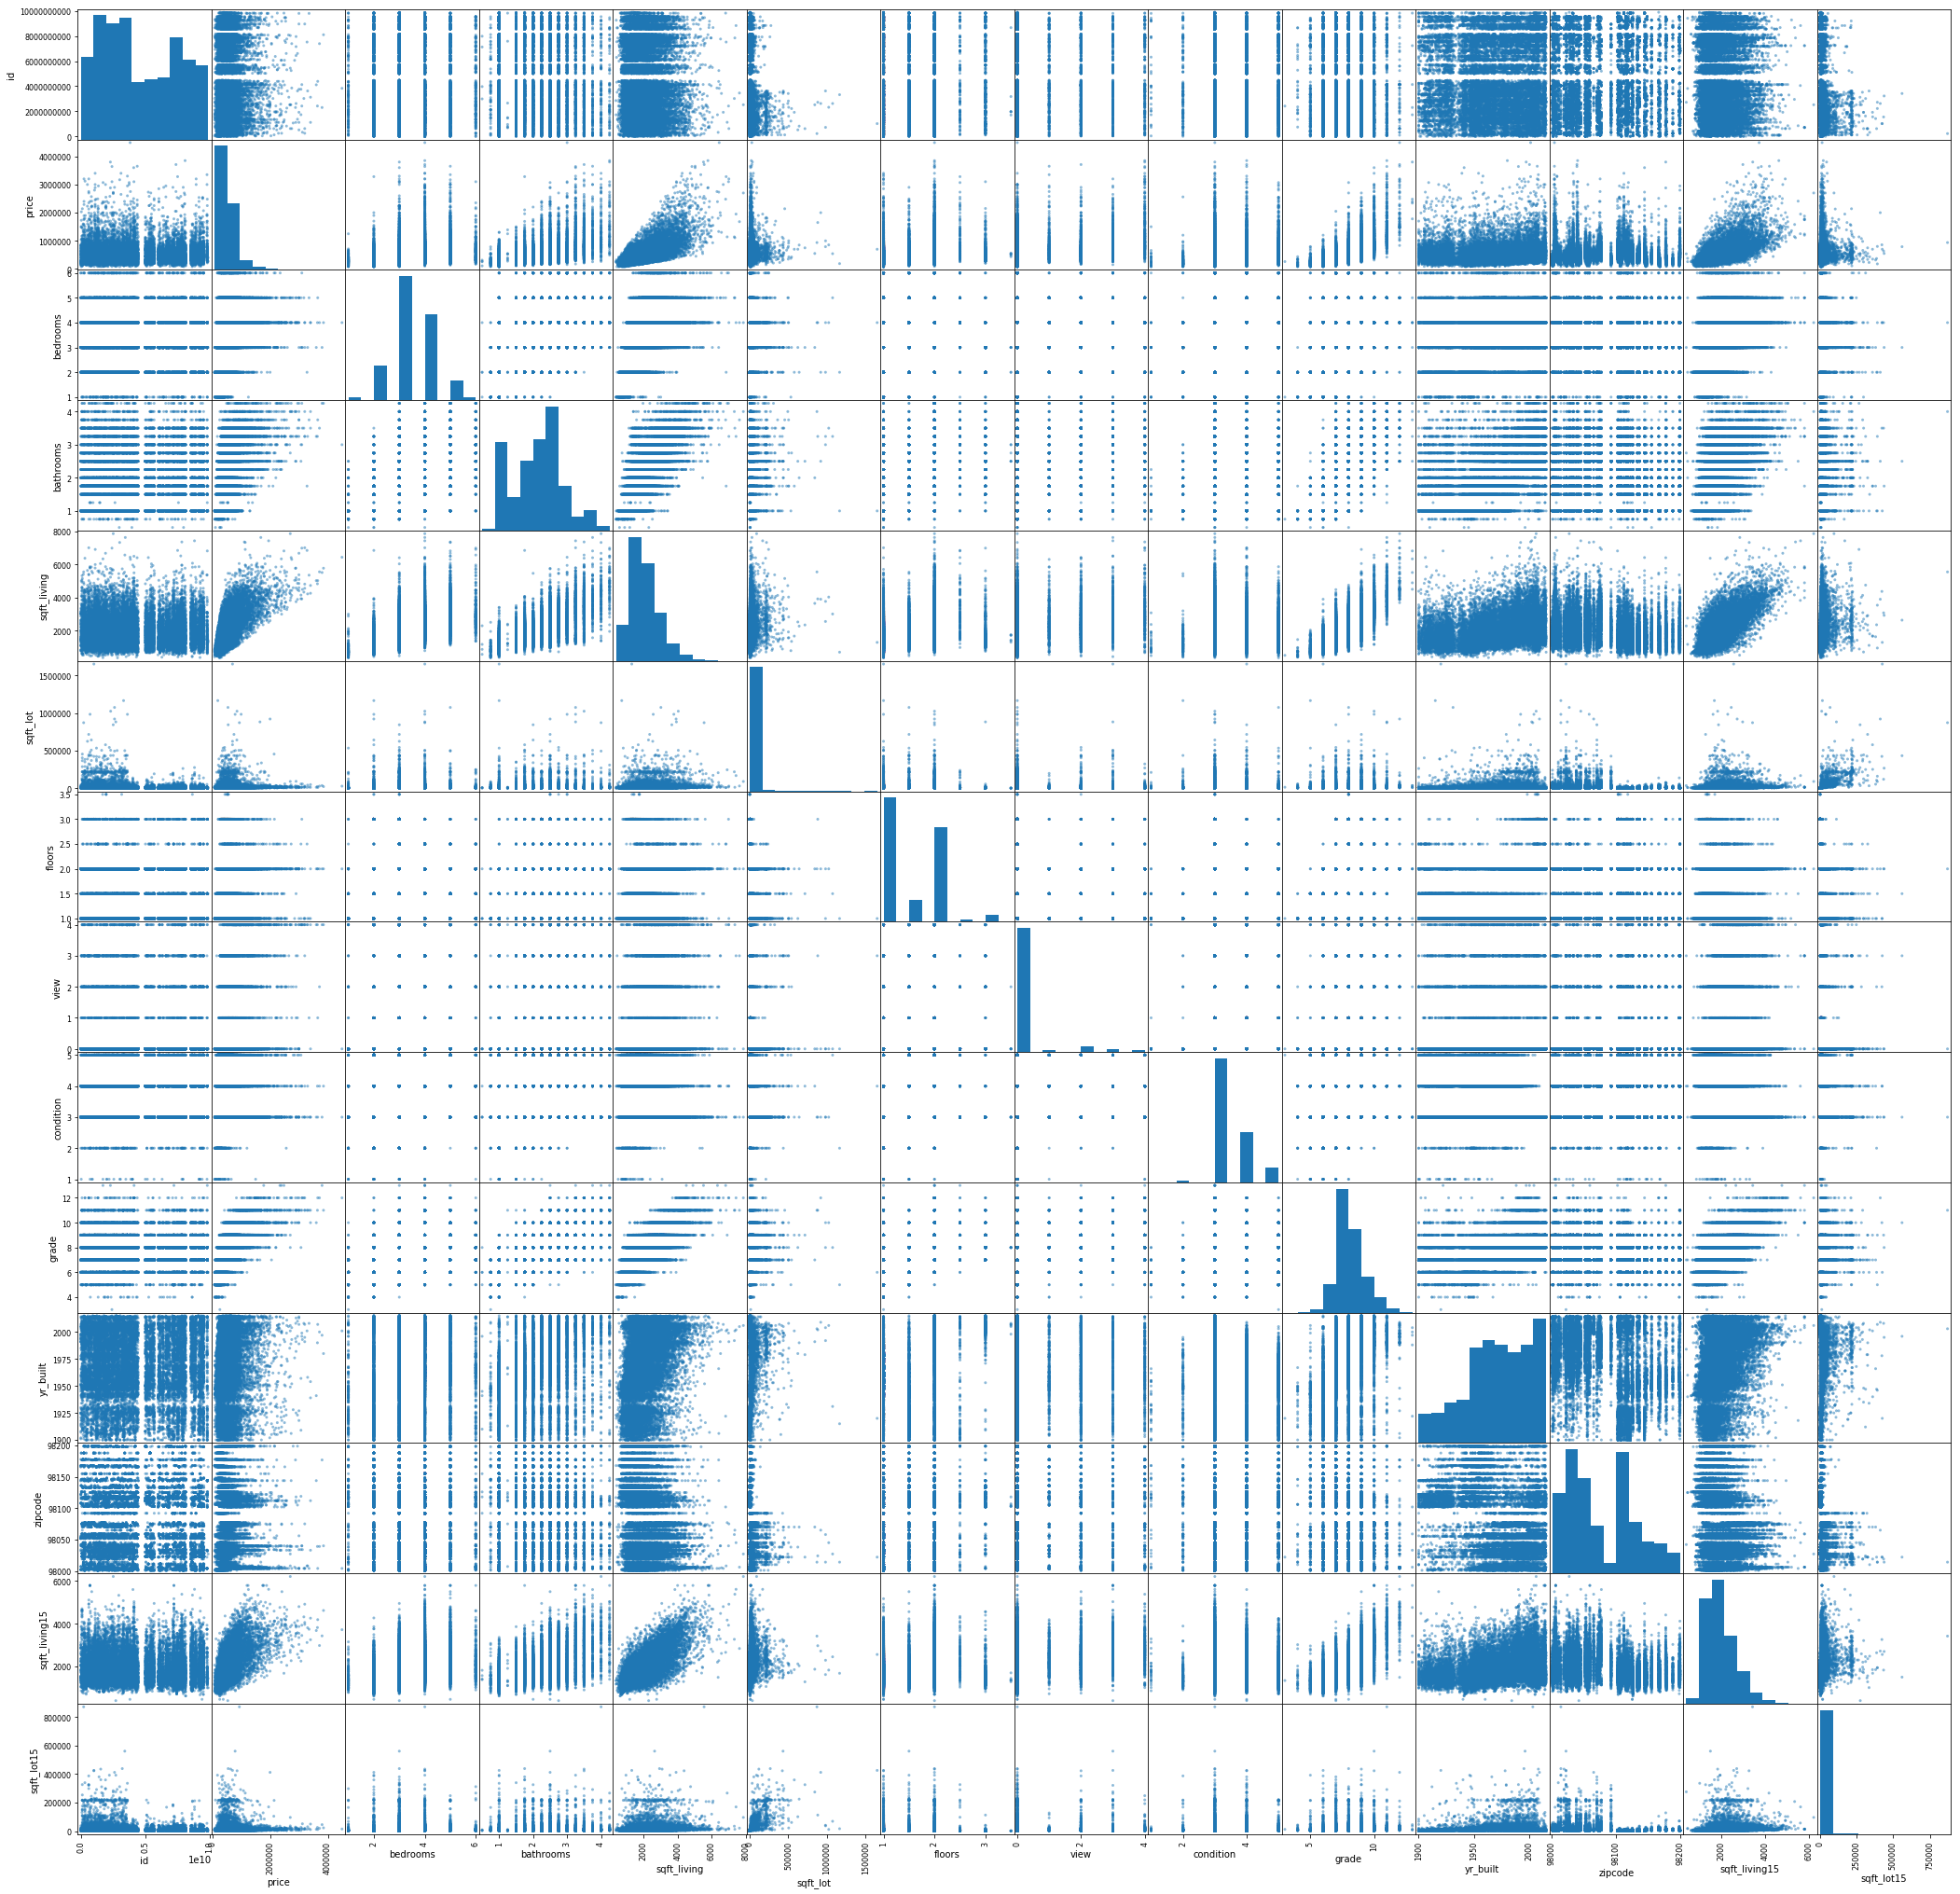

In [110]:
pd.plotting.scatter_matrix(cleaned_KC,alpha=0.5,figsize=(36,36))

In [124]:
categorical_features = ['bathrooms','bedrooms','zipcode','yr_built','grade','condition','view','floors']

In [127]:
for feature in categorical_features:
    cleaned_KC[feature] = cleaned_KC[feature].astype('category')
cleaned_KC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21347
Data columns (total 15 columns):
id               21301 non-null int64
date             21301 non-null object
price            21301 non-null float64
bedrooms         21301 non-null category
bathrooms        21301 non-null category
sqft_living      21301 non-null int64
sqft_lot         21301 non-null int64
floors           21301 non-null category
view             21301 non-null category
condition        21301 non-null category
grade            21301 non-null category
yr_built         21301 non-null category
zipcode          21301 non-null category
sqft_living15    21301 non-null int64
sqft_lot15       21301 non-null int64
dtypes: category(8), float64(1), int64(5), object(1)
memory usage: 1.5+ MB


Since 'bathrooms' are now a category type, it would not be plotted in the scatter matrix

In [128]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,1800,7503


In [129]:
dummy_cleaned_KC = pd.get_dummies(cleaned_KC,columns=categorical_features)
dummy_cleaned_KC

,id,date,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,yr_built_1900,yr_built_1901,yr_built_1902,yr_built_1903,yr_built_1904,yr_built_1905,yr_built_1906,yr_built_1907,yr_built_1908,yr_built_1909,yr_built_1910,yr_built_1911,yr_built_1912,yr_built_1913,yr_built_1914,yr_built_1915,yr_built_1916,yr_built_1917,yr_built_1918,yr_built_1919,yr_built_1920,yr_built_1921,yr_built_1922,yr_built_1923,yr_built_1924,yr_built_1925,yr_built_1926,yr_built_1927,yr_built_1928,yr_built_1929,yr_built_1930,yr_built_1931,yr_built_1932,yr_built_1933,yr_built_1934,yr_built_1935,yr_built_1936,yr_built_1937,yr_built_1938,yr_built_1939,yr_built_1940,yr_built_1941,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1945,yr_built_1946,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1991,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1995,yr_built_1996,yr_built_1997,yr_built_1998,yr_built_1999,yr_built_2000,yr_built_2001,yr_built_2002,yr_built_2003,yr_built_2004,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,10/13/2014,221900.0,1180,5650,1340,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,1690,7639,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

sqft_living has a positive correlation with price
bathrooms has a positive correlation with price
sqft_living15 has a positive correlation with price

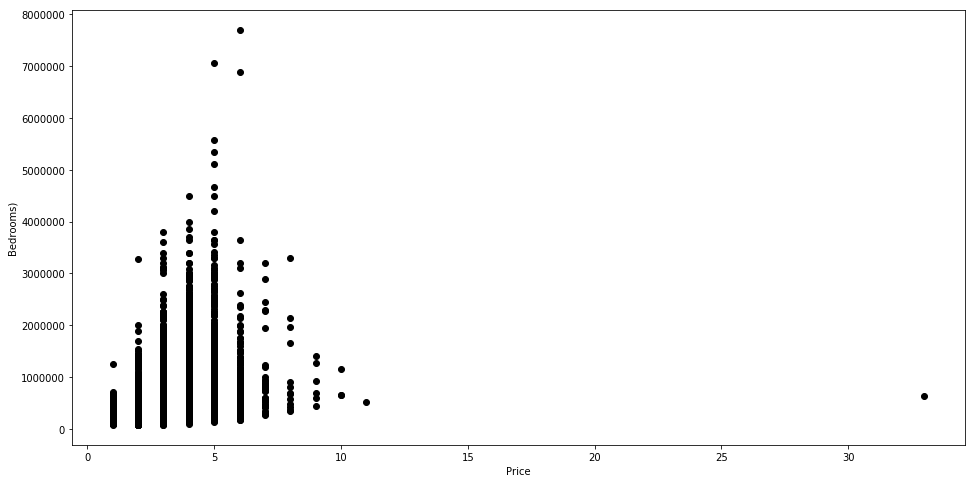

In [65]:
plt.figure(figsize=(16, 8))
plt.scatter(
    cleaned_KC['bedrooms'],
    cleaned_KC['price'],
    c='black'
)
plt.xlabel("Price")
plt.ylabel("Bedrooms)")
plt.show()

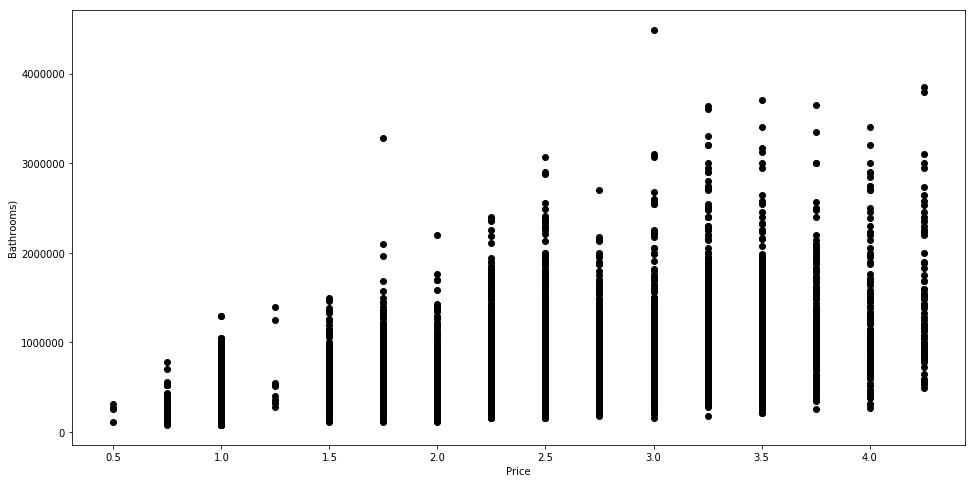

In [122]:
plt.figure(figsize=(16, 8))
plt.scatter(
    cleaned_KC['bathrooms'],
    cleaned_KC['price'],
    c='black'
)
plt.xlabel("Price")
plt.ylabel("Bathrooms)")
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(
    cleaned_KC['price'],
    cleaned_KC['view'],
    c='black'
)
plt.xlabel("Price")
plt.ylabel("View)")
plt.show()

In [68]:
cleaned_KC['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

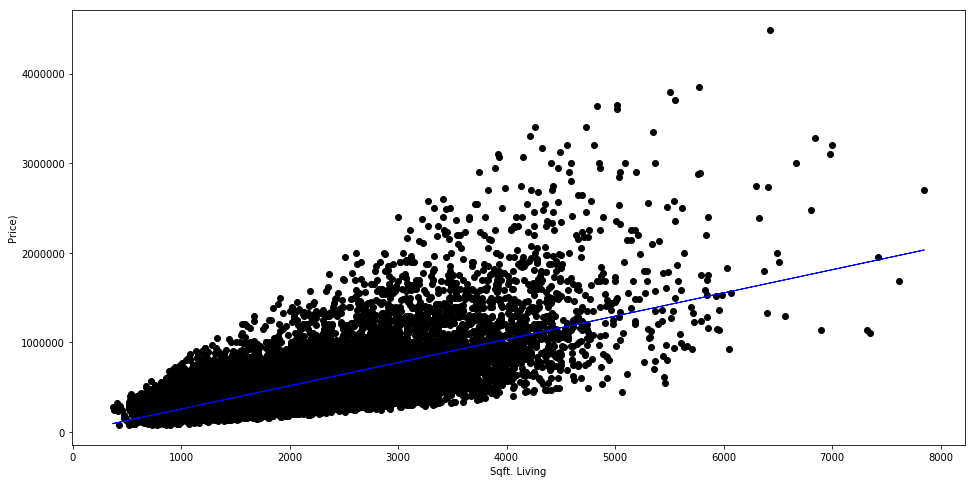

In [113]:
plt.figure(figsize=(16, 8))
plt.scatter(
    cleaned_KC['sqft_living'],
    cleaned_KC['price'],
    c='black'
)
plt.plot(
    cleaned_KC['sqft_living'],
    predictions,
    c='blue',
    linewidth=1
)
plt.xlabel("Sqft. Living")
plt.ylabel("Price)")
plt.show()

In [112]:
X = cleaned_KC['sqft_living'].values.reshape(-1,1)
y = cleaned_KC['price'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)

X = cleaned_KC['sqft_living']
y = cleaned_KC['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/jbenjamin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:39:49   Log-Likelihood:            -2.9433e+05
No. Observations:               21301   AIC:                         5.887e+05
Df Residuals:                   21299   BIC:                         5.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2283.2967   4289.244     -0.532      

Let's now run multiple regressions

In [ ]:
categorical_features = ['bedrooms','bathrooms','zipcode','yr_built','grade','condition','view','floors']

In [132]:
X = np.column_stack((cleaned_KC['sqft_living'], cleaned_KC['bedrooms'], cleaned_KC['bathrooms'], cleaned_KC['yr_built'],cleaned_KC['zipcode'],cleaned_KC['grade'], cleaned_KC['condition'], cleaned_KC['view'], cleaned_KC['floors']))
y = cleaned_KC['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary(xname=['price','sqft_living','bedrooms','bathrooms','zipcode','yr_built','grade','condition','view','floors']))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3996.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:05:19   Log-Likelihood:            -2.9033e+05
No. Observations:               21301   AIC:                         5.807e+05
Df Residuals:                   21291   BIC:                         5.808e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
price        8.165e+06   2.83e+06      2.886      

Previous R-squared & Adj. R-Squared = .52
New R-square value = .628

In [133]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,1800,7503


In [136]:
numeric_cleaned_KC = cleaned_KC._get_numeric_data()

In [137]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cleaned_KC.values, i) for i in range(numeric_cleaned_KC.shape[1])]
vif["features"] = numeric_cleaned_KC.columns

In [138]:
vif.round(1)

,VIF Factor,features
0,2.9,id
1,6.8,price
2,19.6,sqft_living
3,2.3,sqft_lot
4,18.1,sqft_living15
5,2.5,sqft_lot15


Sqft_living and sqft_living15 are thought to have multi-collinearity, thus should both be dropped

In [139]:
cleaned_KC.corr()

,id,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15
id,1.000000,-0.015326,-0.006230,-0.132313,0.000310,-0.141682
price,-0.015326,1.000000,0.677350,0.083969,0.593302,0.077855
sqft_living,-0.006230,0.677350,1.000000,0.162174,0.762537,0.177218
sqft_lot,-0.132313,0.083969,0.162174,1.000000,0.142253,0.709508
sqft_living15,0.000310,0.593302,0.762537,0.142253,1.000000,0.183355
sqft_lot15,-0.141682,0.077855,0.177218,0.709508,0.183355,1.000000
